In [1]:
library(ggplot2); packageVersion("ggplot2")
library(tidyr)
library(tibble)
library(dplyr)
library(vegan); packageVersion("vegan")
library(scales)
library(repr)
library(viridis)
library(pheatmap)

[1] ‘3.2.1’


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: permute
Loading required package: lattice
This is vegan 2.5-6


[1] ‘2.5.6’

Loading required package: viridisLite

Attaching package: ‘viridis’

The following object is masked from ‘package:scales’:

    viridis_pal



In [2]:
tab_dir <- '~/data/awtp2_metagenomics/metagenome_info_tables/'
figs_dir <- '~/data/awtp2_metagenomics/figures/'

# MASH distances with reads

In [5]:
dist <- read.table(paste0(tab_dir, 'awtp2_mash_dist.txt'), sep='\t',
                   col.names = c('query', 'ref', 'distance', 'pval', 'matching_hashes'))

dist$distance <- as.numeric(dist$distance)

metadata <- read.table('~/data/awtp2_metagenomics/metagenome_info_tables/metagenomics_sample_table.tsv', sep='\t', header = TRUE)
# get a lookup of sample_id to sample_code:

id2code <- metadata[,c('sample_id', 'sample_code_partial')]

head(dist)
head(id2code)

query,ref,distance,pval,matching_hashes
<fct>,<fct>,<dbl>,<dbl>,<fct>
KNLK_11,KNLK_11,0.0000000,0.00000e+00,10000/10000
KNLK_13,KNLK_11,0.1912090,8.01352e-143,91/10000
KNLK_16,KNLK_11,0.1447690,0.00000e+00,245/10000
KNLK_23,KNLK_11,0.1938770,9.28982e-137,86/10000
KNLK_28,KNLK_11,0.1528430,0.00000e+00,206/10000
KNLK_32,KNLK_11,0.0371254,0.00000e+00,2975/10000


sample_id,sample_code_partial
<fct>,<fct>
KNLK_1,AWTP_2_RO2_biofilm_control_1
KNLK_10,DWDS_F_282B_bulk_1
KNLK_11,AWTP_2_BAC_bulk_5
KNLK_12,SDS_F_3_bulk_3
KNLK_13,AWTP_2_RO2_biofilm_sep_2
KNLK_14,DWDS_F_utility_bulk_9


In [6]:
# get sample names for plotting
df <- merge(dist, id2code, by.x='query', by.y='sample_id')
df <- merge(df, id2code, by.x='ref', by.y='sample_id')
df <- df[order(df$sample_code_partial.x, df$sample_code_partial.y),] # sort df

## Basic heatmap

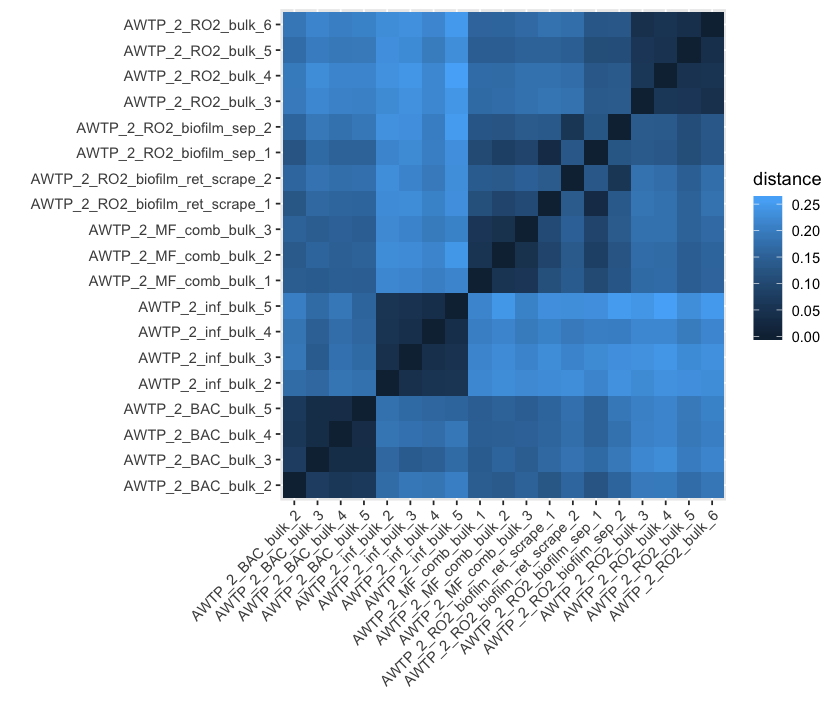

In [7]:
options(repr.plot.width = 7, repr.plot.height = 6)

ggplot(df, aes(x=sample_code_partial.x, y=sample_code_partial.y))+
    geom_tile(aes(fill=distance))+
    theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1))+
    xlab('') + 
    ylab('')
#ggsave('~/data/awtp2_metagenomics/figures/mash_dist_heatmap.pdf', device="pdf", width=7, height=5.5)

## Clustered heatmap

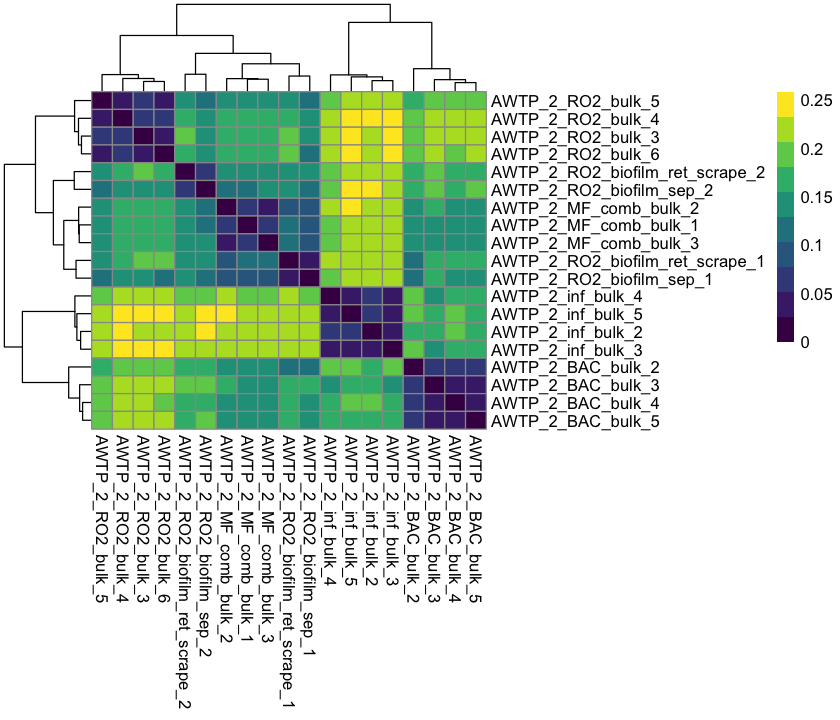

In [8]:
#subset selected columns
df2 <- df[c('sample_code_partial.x', 'sample_code_partial.y', 'distance')]
#reformat table to wide
df_wide <- df2 %>% spread(sample_code_partial.y, distance) %>% column_to_rownames('sample_code_partial.x')
#heatplus requires a matrix not a dataframe
m <- as.matrix(df_wide)
options(repr.plot.width = 7, repr.plot.height = 6)
pheatmap(m, color=viridis(10))
#pheatmap(m, color=viridis(10), filename=paste0(figs_dir, 'mash_dist_clustered_heatmap.pdf'))

# Compile summary table

## Read and process all tables

In [179]:
# non-sequencing data
nonseqdata <- read.table(paste0(tab_dir, 'metagenomics_sample_table.tsv'), sep='\t', header = TRUE)
awtp2_nonseqdata <- nonseqdata[nonseqdata$project_type=='DPWF',]
awtp2_nonseqdata <- rename(awtp2_nonseqdata, sample_name=sample_code_partial)
awtp2_nonseqdata <- subset(awtp2_nonseqdata, select=c('sample_id', 'DNA_Ext_conc_ng.uL', 'sample_date', 'location_code', 'sample_name'))

,sample_id,DNA_Ext_conc_ng.uL,sample_date,location_code,sample_name
,<fct>,<dbl>,<fct>,<fct>,<fct>
3,KNLK_11,169.000,12/14/2017,BAC,AWTP_2_BAC_bulk_5
5,KNLK_13,0.071,8/8/2018,RO_BF_separator,AWTP_2_RO2_biofilm_sep_2
8,KNLK_16,1.070,10/10/2017,MF_combined,AWTP_2_MF_comb_bulk_1
16,KNLK_23,0.399,11/14/2017,RO_2stage,AWTP_2_RO2_bulk_5
21,KNLK_28,1.910,11/14/2017,MF_combined,AWTP_2_MF_comb_bulk_2
26,KNLK_32,27.000,10/10/2017,BAC,AWTP_2_BAC_bulk_3
27,KNLK_33,518.000,11/14/2017,WW_3ary,AWTP_2_inf_bulk_4
32,KNLK_38,1.170,1/10/2018,RO_BF_separator,AWTP_2_RO2_biofilm_sep_1
38,KNLK_43,30.500,8/8/2018,RO_BF_retentate_scrapings,AWTP_2_RO2_biofilm_ret_scrape_2


In [168]:
# trimmed read data
reads <- read.table(paste0(tab_dir, 'trimmed_reads_stats.txt'), sep='\t', header=TRUE)
reads = separate(reads, col=file, into=c('sample_id', 'mate_pair'), sep='\\.', extra='merge')
reads = reads[c(1,2,5,6)] %>% group_by(sample_id) %>% summarise_if(is.numeric, sum)
colnames(reads) <- c('sample_id', 'read_count', 'length_reads')
reads$read_count_M <- round((reads$read_count / 1e6),1)
reads$length_reads_Gbp <- round((reads$length_reads / 1e9),1)
reads <- reads[c('sample_id', 'read_count', 'read_count_M', 'length_reads_Gbp')]

In [169]:
# megahit assembly data
assemblies <- read.table(paste0(tab_dir, 'assembly_stats.megahit.042720.txt'), sep=' ', header=FALSE)
assemblies <- assemblies[c(1,4,7,13,16,19)]
colnames(assemblies) <- c('name', 'num_contigs', 'length_assem_bp', 'length_max_contig', 'length_avg_contig', 'assem_N50')
assemblies <- separate(assemblies, col=name, into=c('sample_name'), sep='/', extra='drop')
assemblies$length_assem_Mbp <- round((assemblies$length_assem_bp / 1e6),1)
assemblies <- subset(assemblies, select=-c(length_assem_bp))

In [201]:
# contamination data
contam <- read.table(paste0(tab_dir, 'all_contam_report.txt'), sep='\t', header=TRUE)
colnames(contam) <- c('sample_name',
                       'contams_perc_of_total_cov', 
                       'contams_perc_of_total_length',
                       'contams_length_bp',
                       'length_assem_min1000',
                       'contams_num_splits')

In [170]:
# readmapping data
reads_mapped <- read.table(paste0(tab_dir, 'reads_mapped_DPWF.txt'), header=FALSE)
colnames(reads_mapped) <- c('reads_mapped')
count_cmd <- read.table('~/work/awtp2/workflows/count_mapped_DPWF.sh', sep=' ', header=FALSE)[6]
colnames(count_cmd) <- c('mapping')
sample_id <- extract(count_cmd, col=mapping, into='sample_id', regex=".+-vs-(.+).bam", remove=TRUE)
reads_mapped <- cbind(sample_id, reads_mapped)

In [171]:
# anvio assembly info
# update this after spliting out contams
contig_stats <- t(read.table(paste0(tab_dir, 'contig_stats_includesContams.txt'), header=TRUE, row.names=1, sep='\t'))
contig_stats <- as.data.frame(contig_stats)
contig_stats <- contig_stats[order(row.names(contig_stats)),]
contig_stats <- subset(contig_stats, select=c('Num Contigs', 'Ribosomal_RNAs', 'bacteria (Bacteria_71)', 'archaea (Archaea_76)', 'eukarya (Protista_83)'))
contig_stats <- rownames_to_column(contig_stats, var = "sample_name")
colnames(contig_stats) <- c('sample_name', 'num_contigs_min1000', 'rRNA_genes', 'est_num_bacteria', 'est_num_archaea', 'est_num_protista')

## Merge tables and make plots

In [240]:
merged_data <- merge(awtp2_nonseqdata, reads, by='sample_id')
merged_data <- merge(merged_data, assemblies, by='sample_name')
merged_data <- merge(merged_data, reads_mapped, by='sample_id')
merged_data <- merge(merged_data, contam, by='sample_name')
merged_data <- merge(merged_data, contig_stats, by='sample_name')
merged_data$location_code <- factor(merged_data$location_code, levels = c('WW_3ary', 'BAC', 'MF_combined', 'RO_2stage', 'RO_BF_retentate_scrapings', 'RO_BF_separator'))
merged_data$perc_mapped <- round(100*(merged_data$reads_mapped / merged_data$read_count),2)
merged_data$sample_date <- as.Date(merged_data$sample_date, '%m/%d/%Y')
merged_data <- merged_data[order(merged_data$location_code, merged_data$sample_date), ]
merged_data

,sample_name,sample_id,DNA_Ext_conc_ng.uL,sample_date,location_code,read_count,read_count_M,length_reads_Gbp,num_contigs,length_max_contig,⋯,contams_perc_of_total_length,contams_length_bp,length_assem_min1000,contams_num_splits,num_contigs_min1000,rRNA_genes,est_num_bacteria,est_num_archaea,est_num_protista,perc_mapped
,<fct>,<fct>,<dbl>,<date>,<fct>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
5,AWTP_2_inf_bulk_2,KNLK_77,158.000,2017-09-26,WW_3ary,197255244,197.3,29.4,507170,760303,⋯,0.00,2555,270750259,2,81082,120,57,1,1,88.02
6,AWTP_2_inf_bulk_3,KNLK_66,680.000,2017-10-10,WW_3ary,191306438,191.3,28.6,473614,1360333,⋯,0.00,11564,314334042,8,86068,156,101,0,0,89.65
7,AWTP_2_inf_bulk_4,KNLK_33,518.000,2017-11-14,WW_3ary,183699926,183.7,27.5,449254,1014114,⋯,0.01,17084,270473050,12,75409,117,76,0,0,88.29
8,AWTP_2_inf_bulk_5,KNLK_44,542.000,2017-12-14,WW_3ary,105419942,105.4,15.8,347968,869440,⋯,0.00,5363,229061380,4,66387,90,51,1,0,87.81
1,AWTP_2_BAC_bulk_2,KNLK_9,17.500,2017-09-26,BAC,196383818,196.4,29.4,1522973,1345282,⋯,0.38,3227142,848943691,1840,280549,254,171,0,0,77.71
2,AWTP_2_BAC_bulk_3,KNLK_32,27.000,2017-10-10,BAC,158516508,158.5,23.7,993532,1532752,⋯,0.01,75160,693959676,23,185429,235,129,0,0,80.85
3,AWTP_2_BAC_bulk_4,KNLK_76,85.600,2017-11-14,BAC,201743132,201.7,30.0,1478460,1389257,⋯,0.01,104544,903530568,38,274462,304,221,1,0,76.47
4,AWTP_2_BAC_bulk_5,KNLK_11,169.000,2017-12-14,BAC,192964882,193.0,28.7,1197560,1055407,⋯,0.01,65315,768631524,29,204165,273,195,0,0,80.02
9,AWTP_2_MF_comb_bulk_1,KNLK_16,1.070,2017-10-10,MF_combined,47973524,48.0,7.2,223492,822776,⋯,2.77,3129092,112915796,1819,33185,48,29,0,0,85.50


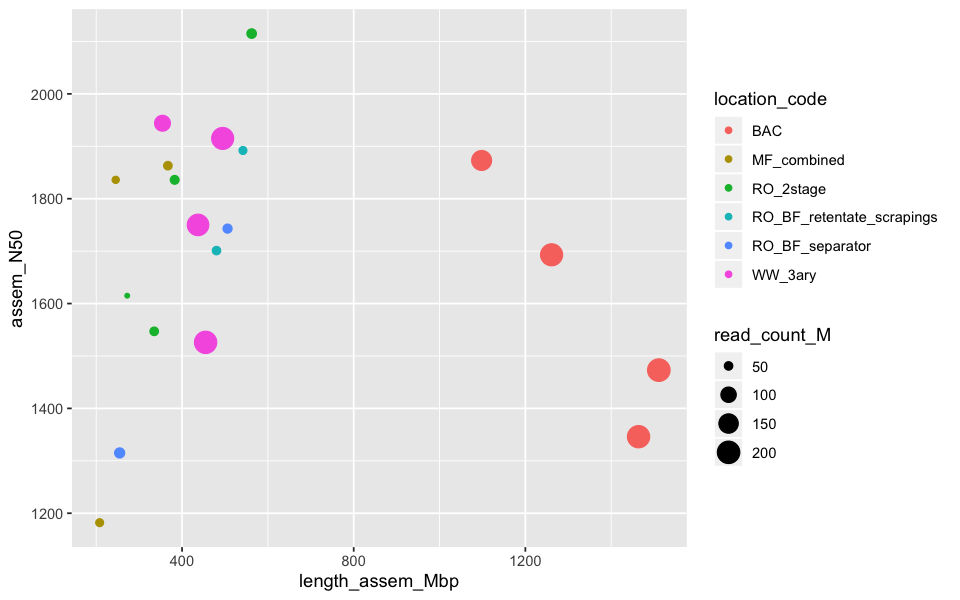

In [181]:
options(repr.plot.width = 8, repr.plot.height = 5)

ggplot(merged_data, aes(x=length_assem_Mbp, y=assem_N50, size=read_count_M, color=location_code))+
    geom_point()#+
    #scale_y_continuous(trans="log10", limits=c(1e8, 1e10), labels=trans_format("log10", math_format(10^.x)))

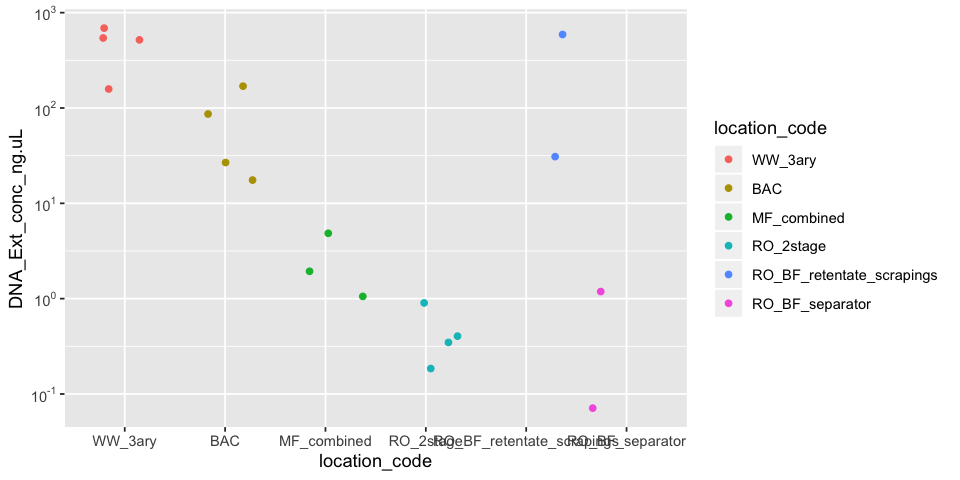

In [203]:
options(repr.plot.width = 8, repr.plot.height = 4)
ggplot(merged_data, aes(x=location_code, y=DNA_Ext_conc_ng.uL, color=location_code))+
    geom_jitter()+
    scale_y_continuous(trans="log10", labels=trans_format("log10", math_format(10^.x)))

Warning message:
“Transformation introduced infinite values in continuous y-axis”

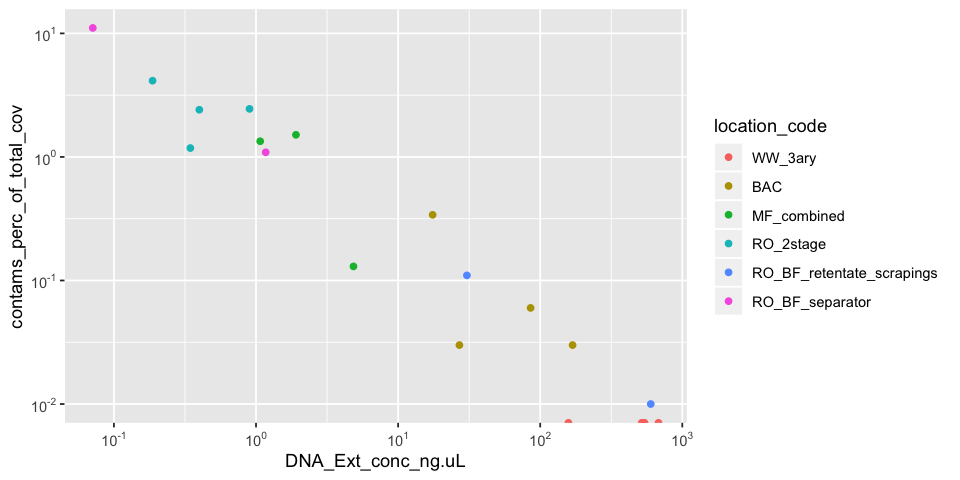

In [227]:
options(repr.plot.width = 8, repr.plot.height = 4)
ggplot(merged_data, aes(x=DNA_Ext_conc_ng.uL, y = contams_perc_of_total_cov, color=location_code))+
    geom_point()+
    scale_x_continuous(trans="log10", labels=trans_format("log10", math_format(10^.x)))+
    scale_y_continuous(trans="log10", labels=trans_format("log10", math_format(10^.x)))

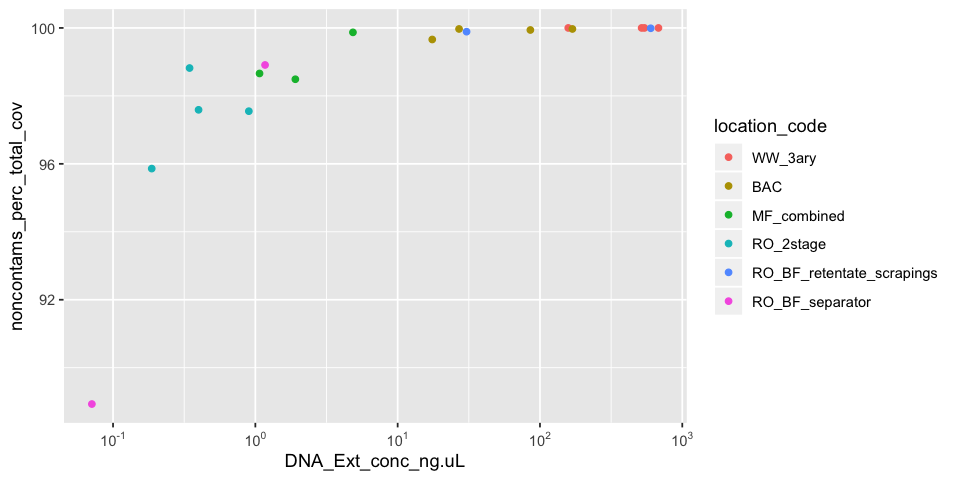

In [248]:
merged_data$noncontams_perc_total_cov <- 100-merged_data$contams_perc_of_total_cov

options(repr.plot.width = 8, repr.plot.height = 4)
ggplot(merged_data, aes(x=DNA_Ext_conc_ng.uL, y = noncontams_perc_total_cov, color=location_code))+
    geom_point()+
    scale_x_continuous(trans="log10", labels=trans_format("log10", math_format(10^.x)))
    #scale_y_continuous(trans="log10", labels=trans_format("log10", math_format(10^.x)))

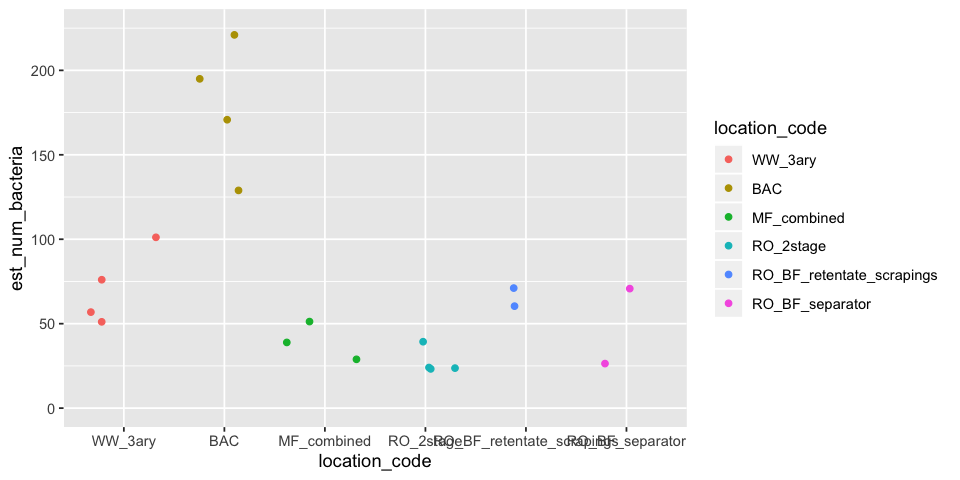

In [256]:
ggplot(merged_data, aes(x=location_code, y=est_num_bacteria, color=location_code))+
    geom_jitter()+
    ylim(0,225)